# **Vehicle Insurance Company : Customer Lifetime Value**

### **Business Understanding**

Vehicle insurance (also known as car insurance, motor insurance, or auto insurance) is insurance for cars, trucks, motorcycles, and other road vehicles. Its primary use is to provide financial protection against physical damage or bodily injury resulting from traffic collisions and against liability that could also arise from incidents in a vehicle. [World Health Organization (WHO)](https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuriesVehicle) said every year the lives of approximately 1.3 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury. Insurance may additionally offer financial protection against theft of the vehicle, and against damage to the vehicle sustained from events other than traffic collisions, such as keying, weather or natural disasters and damage sustained by colliding with stationary objects. The specific terms of vehicle insurance vary with legal regulations in each region.

Vehicle insurance premiums are determined before actual costs of damages are known and can vary based on the type of insurance. Because providers don’t know the cost of damages, **they’re forced to base premium prices on the severity of each claim in terms of overall cost and how frequent people file claims. customers also work to regulate fraud, filing false claims, in order to keep premiums down.**

### **Problem Statement**

In taking care of customers, this insurance is often not handled properly by stakeholders especially financial and marketing to able to get customers. This refers to the value of a consumer towards a brand as long as they are customers. company need to know that this customer lifetime value is one of the metrics that can be tracked to measure how valuable a consumer in terms of the time spent they are offer, which is calculated from the first purchase.

This customer lifetime value will help company to retain existing customers. Because getting new customers is much more difficult and requires more time and cost than retaining existing ones. **Understanding customer lifetime value will also help company business to develop strategies to increase sales while on the other hand can maintain stable profit margins.** 

### **Purpose Analysis**

Based on these problems, insurance certainly needs to have a tool called Cusomer Lifetime Value that can predict which customers can predict the total revenue that the company can get from these customers **to determine which customers have a good offers to company decide by highest customer lifetime value from all the company's customers**. The differences in the various features found in a Vehicle Class, Coverage, Renew Offer Type, Marital Status, Employment Status, Monthly Premium Auto, Total Claim Amount, Income. Could increased the accuracy of the offers price prediction, which can be profitable for the company. This method is also quite effective for setting up a marketing strategy, where you can estimate the amount of commensurate costs to get new customers, without exceeding the customer lifetime value of existing customers. CLV = Average transaction value x (Number of transactions in one year x retention time)

Knowing customer lifetime value also makes it easier for you as a business owner to create the best program based on the buyer's ability of each consumer and also their level of loyalty. This also allows you to find out which consumers can be said to be loyal and deserve rewards that can later increase customer satisfaction. Trying to satisfy consumers with high customer lifetime value is definitely more promising than if you randomly give rewards in the hope of helping to significantly increase purchases.

### **Analytic Approach**

Data scientist needs to do is analyze the data to be able to find patterns of existing features, which differentiate one customer from another.

Data scientist would build a regression model that will help the company to provide a tool and predict the highest customer lifetime value that will be useful for the company for determine offers to customers.

### **Metric Evaluation**

The evaluation metrics that will be used are RMSE, MAE, and MAPE, where RMSE is the mean value of the square root of the error, MAE is the average absolute value of the error, while MAPE is the average percentage error generated by the regression model. The smaller the resulting RMSE, MAE, and MAPE values, it means that the model is more accurate in predicting customers lifetime value according to the limitations of the features used.

In addition, we can also use the value of R-squared or adj. R-squared if the model that will be selected as the final model is a linear model. The R-squared value is used to determine how well the model can represent the overall variance of the data. The closer to 1, the more fit the model is to the observation data. However, this metric is not valid for non-linear models.

# **Data Understanding**

- Dataset was insurance company customer lifetime value in **2021**.
- Each row of data represents information related to customers data.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class  | Object | Type of vehicle |
| Coverage   | Object | Type of cover insurance |
| Renew Offer Type | Object | Type offer renewal|
| EmploymentStatus | Object | Type employ |
| Marital Status | Object | Type marital |
| Education | Object | Type degree |
| Number of Policies | Float | Type Number |
| Monthly Premium Auto | Float | Listing monthly premium |
| Total Claim Amount | Float | Listing claim amount|
| Income | Float | Listing income |
| Customer Lifetime Value | Float | Listing CLV|

<br>

In [1]:
# Import libraries needed for dataset exploration
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


#### **Exploratory Data Analysis**
Distribution of CLV

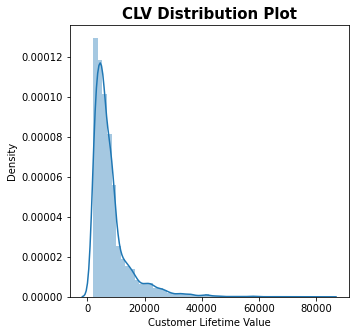

In [3]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(5, 5))
sns.distplot(df['Customer Lifetime Value'])
plt.title('CLV Distribution Plot', size=15, weight='bold');

Based on the distribution plot above, it can be seen that there is a **right-skewed distribution**. In other words, there is a positive skewness in the CLV feature.

**Types of vehicle related to CLV**

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,5067.546013,6273.542658,8343.821811
Luxury Car,14081.857550,17929.580920,11250.098570
Luxury SUV,13144.491010,17582.700890,10945.326100
SUV,8356.181097,9575.357152,13210.796010
Sports Car,8500.121950,9756.044954,7256.576235
Two-Door Car,4898.605666,6457.840465,8055.147361


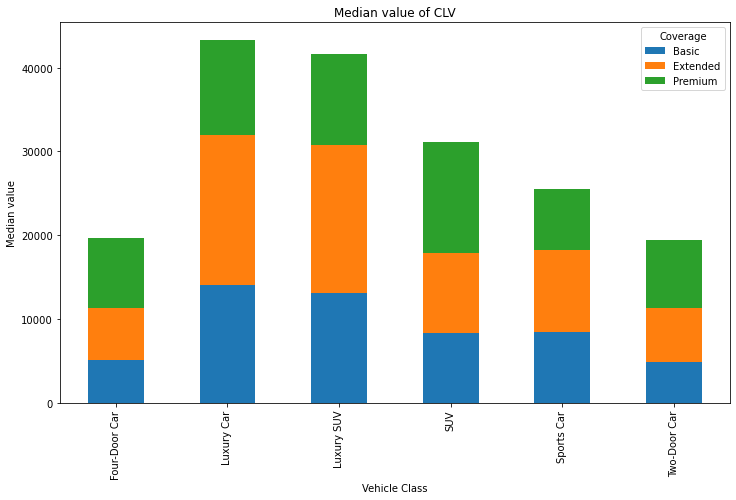

In [4]:
# Plot median CSV for each vehicle
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Vehicle Class', columns='Coverage', values='Customer Lifetime Value', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Vehicle Class')
pivot_plot.set_ylabel('Median value')
pivot_plot.set_title('Median value of CLV');

luxury cars have the highest median price for each consumer value, where the coverage type is Extended, the median price reaches 3 times the premium consumer value, which is around 30000. The highest average coverage value is Luxury Cars, but it turns out that the median value of consumer insurance on Four-Door Cars is even far below Luxury Cars which have the lowest average coverage value.

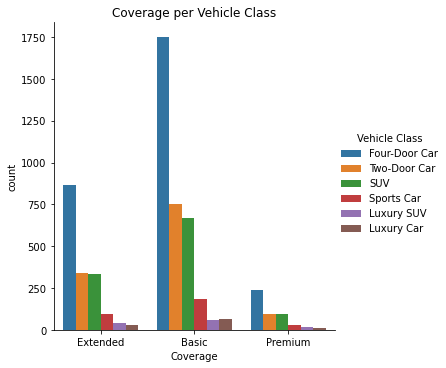

In [5]:
# Distribution vihacle types based on coverage
sns.catplot(x='Coverage', kind='count', hue='Vehicle Class', data=df);
plt.title('Coverage per Vehicle Class');

The majority of vehicle types are Four-Door Cars and basic coverage types, while the majority of Luxury car types mostly use basic coverage. This can be an indication that the preference for taking premium offerings is rarely taken, even though the preference for luxury cars can be increased to premium so that services can match the type of vehicle.

### Data Preproccessing
We could do cleaning on the data which later the cleaned data will be used for the next analysis process. Some of the things that need to be done are:
- Drop features that have no relevance to the problem at hand.
- Perform treatment on missing values if any. It could be done by dropping the feature if it is'nt needed or it could also computed with the most reasonable value based on the case.

For data preprocessing and feature engineering, would use a duplicated dataframe from the previously used dataframe.

In [6]:
# Duplicate dataframes
df_clean = df.copy()

In [7]:
# Detail info in dataframes
Desc = []
for i in df_clean :
  Desc.append([
              i,
              df_clean[i].dtypes,
              df_clean[i].isna().sum(),
              round(df_clean[i].isna().sum()/len(df_clean)*100, 2),
              df_clean[i].nunique(),
              df_clean[i].drop_duplicates().sample(2).values])

pd.DataFrame(Desc, columns = ['Columns', 'Data Types', 'Total Missing Value', '% Missing Value', 'Total Unique', 'Unique Sample'])

,Columns,Data Types,Total Missing Value,% Missing Value,Total Unique,Unique Sample
0,Vehicle Class,object,0,0.0,6,"[Luxury SUV, Luxury Car]"
1,Coverage,object,0,0.0,3,"[Premium, Basic]"
2,Renew Offer Type,object,0,0.0,4,"[Offer3, Offer2]"
3,EmploymentStatus,object,0,0.0,5,"[Medical Leave, Disabled]"
4,Marital Status,object,0,0.0,3,"[Single, Divorced]"
5,Education,object,0,0.0,5,"[High School or Below, Master]"
6,Number of Policies,float64,0,0.0,9,"[4.0, 3.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[244.0, 83.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[266.165535, 580.473259]"
9,Income,float64,0,0.0,3625,"[90353.0, 33738.0]"


In the data above, there is no missing value in the data, so there is no need for further observation

In [8]:
# Check duplicated
df_clean.duplicated().sum()

618

In [9]:
#Drop data duplicates
drop_duplicates = df_clean.drop_duplicates()

In this data, 618 duplicate data were found that needed to be dropped because it could affect further data processing

### Drop Columns
Of course there needs to be consideration before dropping a column or feature. As a consideration, at this early stage we can use domain knowledge to decide which features are deemed irrelevant.
- If reviewed based on domain knowledge, features 'Education', and 'Number of Policies' have no relevance and importance for predictive analysis.
- 'Education' has no relatable to target CLV because there is no standard education has to be increased value on CLV calculation
- 'Number of Policies' i it's just a typical number has different police numbers in each different rules

In [10]:
# Drop some unnecessary columns
df_clean.drop(['Education','Number of Policies'], axis=1, inplace=True)

In [11]:
# Check new dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Monthly Premium Auto     5669 non-null   float64
 6   Total Claim Amount       5669 non-null   float64
 7   Income                   5669 non-null   float64
 8   Customer Lifetime Value  5669 non-null   float64
dtypes: float64(4), object(5)
memory usage: 398.7+ KB


In [12]:
# Check statistics descriptive
features = [feature for feature in df_clean.columns if ((df_clean[feature].dtypes != 'object'))]
df_clean[features].describe()

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000
mean,93.026989,431.407103,37868.188569,8029.874592
std,34.551795,287.558038,30490.490723,6916.708246
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,266.932542,0.000000,3954.344534
50%,82.000000,379.200000,34322.000000,5800.188903
75%,109.000000,549.986128,62464.000000,9031.214859
max,297.000000,2759.794354,99934.000000,83325.381190


There is a value that should not be 0 because it is not possible to have no income and can pay for insurance. Therefore, data that has a value of Income = 0 is better if the data is filled with the iterative imputer with prediction linear value of Income. In addition, in order to build a better predictive model, we filter the data again by only selecting the Total claim amount which has a minimum of 50 so below 50 will not be used for the modeling process.

In [13]:
df_clean[df_clean['Income'] == 0]['Income'].count()

1429

In [14]:
df_clean['Income'].replace(0.000000, np.nan)

0       11828.0
1       44762.0
2       21514.0
3       17913.0
4       19030.0
         ...   
5664        NaN
5665    27778.0
5666    84658.0
5667    22705.0
5668    60184.0
Name: Income, Length: 5669, dtype: float64

It can be seen that income 0 may occur due to government subsidies or legal provisions that there are some people who have subsidized vehicles, the data which is automatically not changed and not all data is filled with the mean.

In [15]:
df_clean[df_clean['Total Claim Amount'] < 50]['Total Claim Amount'].count()

276

In [16]:
# Drop data dengan nilai Total claim amount < 50
df_clean = df_clean[(df_clean['Total Claim Amount'] > 50)]

### Data Correlation

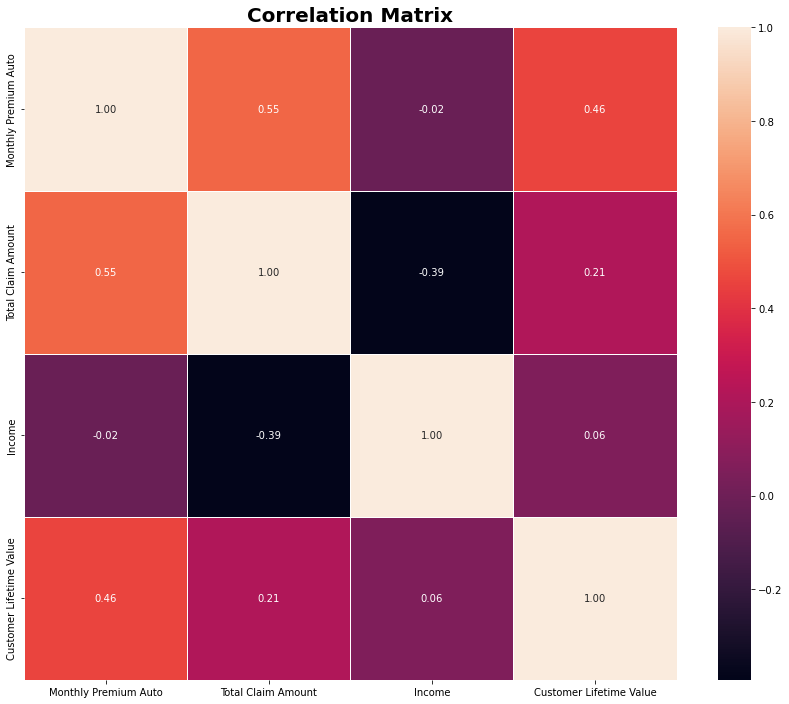

In [17]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_clean.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=20, weight='bold');

The correlation matrix shows that there is no feature that has a strong correlation to the Customer Lifetime Value feature. The highest correlation is owned by **Monthly Premium Auto** features, where the correlation is a positive correlation. This mean that the further transaction, the higher the customer value.

We would examine the distribution of data and outliers for the respective numerical features. If the distribution has a high skewness, one way we can reduce it is by engineering each of its features.

### Outliers

The number of outliers in the data will certainly affect the results of the analysis and modeling carried out. There are several things that must be considered before deciding on a treatment that is in accordance with the data, including considering the domain knowledge side.

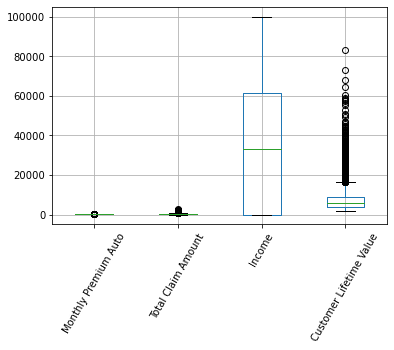

In [18]:
# Boxplot to check outliers
df_clean.boxplot(rot=60);

There are a lot of outliers in some features. In this project, to create a dataset that is cleaner from outliers and analysis with data engineering on the features by considering the combination of the results of the IQR method and also the domain knowledge. Later, the resulting model can only predict new listings whose values are in the data range based on this 'clean dataset' only. Outside the data range, the prediction results from the model will be biased.

In [19]:
# Check Outliers Function
def check_anomalies(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR =  Q3 - Q1
    BOUND = IQR*1.5
    print(f'IQR: {IQR}')

    Below = Q1 - BOUND
    Above = Q3 + BOUND
    print(f'pale below: {Below}')
    print(f'pale above: {Above}') 

In [20]:
# Outliers of CLV
check_anomalies(df_clean['Customer Lifetime Value'])

IQR: 5086.590234000001
pale below: -3658.540254000002
pale above: 16687.820682


In [21]:
# Outliers of Income
check_anomalies(df_clean['Income'])

IQR: 61321.0
pale below: -91981.5
pale above: 153302.5


In [22]:
# Outliers of Total Claim Amount
check_anomalies(df_clean['Total Claim Amount'])

IQR: 265.29935700000004
pale below: -105.14903550000002
pale above: 956.0483925000001


In [23]:
# Outliers of Monthly Premium Auto
check_anomalies(df_clean['Monthly Premium Auto'])

IQR: 40.0
pale below: 9.0
pale above: 169.0


The data above is the range of data required by data analysis to avoid bias

## Feature Engineering

**Customer Lifetime Value**

In [24]:
df_clean['Customer Lifetime Value'].describe()

count     5393.000000
mean      8081.480954
std       6984.207103
min       1898.007675
25%       3971.345097
50%       5824.224192
75%       9057.935331
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [25]:
# CLV Check Anomalies
df_clean[df_clean['Customer Lifetime Value'] > 16687.82 ].count()['Customer Lifetime Value']

481

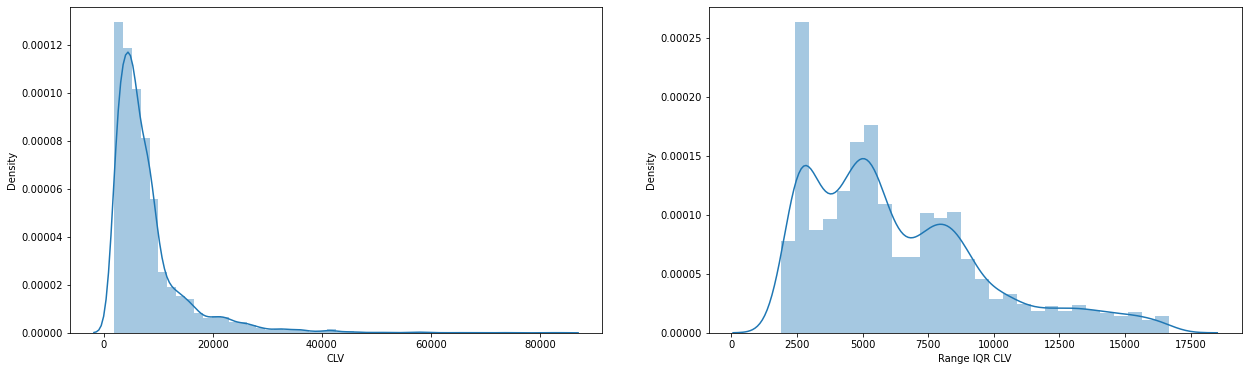

In [26]:
# Filter Data
df_clean = df_clean[(df_clean['Customer Lifetime Value'] <= 16687.82)]

# Plot filter data
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(df_clean['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('CLV')
axes[1].set_xlabel('Range IQR CLV');

In [27]:
#after filter data
df_clean['Customer Lifetime Value'].describe()

count     4912.000000
mean      6341.038511
std       3335.247184
min       1898.007675
25%       3732.502888
50%       5503.432918
75%       8239.395597
max      16681.326340
Name: Customer Lifetime Value, dtype: float64

The range of data in CLV is found at 16687.82 while the maximum value in CLV is 83325, there will be a lot of data outliers that will affect the data and must match the range of data required in the analysis, so filtering this data will reduce the risk of data being biased.

**Income**

In [28]:
df_clean['Income'].describe()

count     4912.000000
mean     37033.857899
std      30458.383189
min          0.000000
25%          0.000000
50%      32912.000000
75%      61105.250000
max      99934.000000
Name: Income, dtype: float64

In [29]:
df_clean[df_clean['Income']> 153302.5].count()['Income']

0

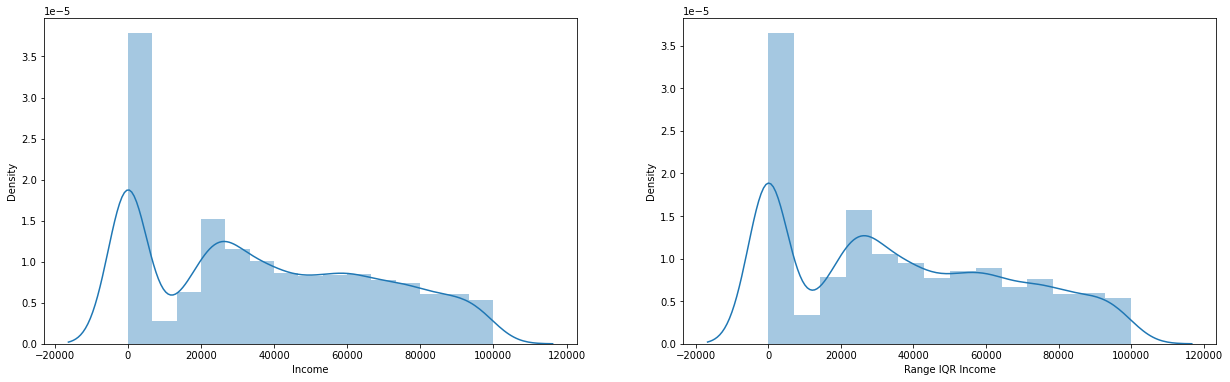

In [30]:
# Filter Data
df_clean = df_clean[(df_clean['Income'] <= 153302.5)]

# Plot filter data
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Income'], ax=axes[0])
sns.distplot(df_clean['Income'], ax=axes[1])
axes[0].set_xlabel('Income')
axes[1].set_xlabel('Range IQR Income');

For income, it appears that the income range does not have an upper range advantage but has a value of less than 10000, almost 25 percent of the existing data, it will be left alone because the income feature has full significance to the analysis so that the range also looks high skewness.

**Total Claim Amount**

In [31]:
df_clean['Total Claim Amount'].describe()

count    4912.000000
mean      442.793884
std       265.914906
min        50.171541
25%       292.800000
50%       392.103016
75%       552.873537
max      2759.794354
Name: Total Claim Amount, dtype: float64

In [32]:
# Total Claim Amount check anomalies 
df_clean[df_clean['Total Claim Amount'] > 956.04 ].count()['Total Claim Amount']

213

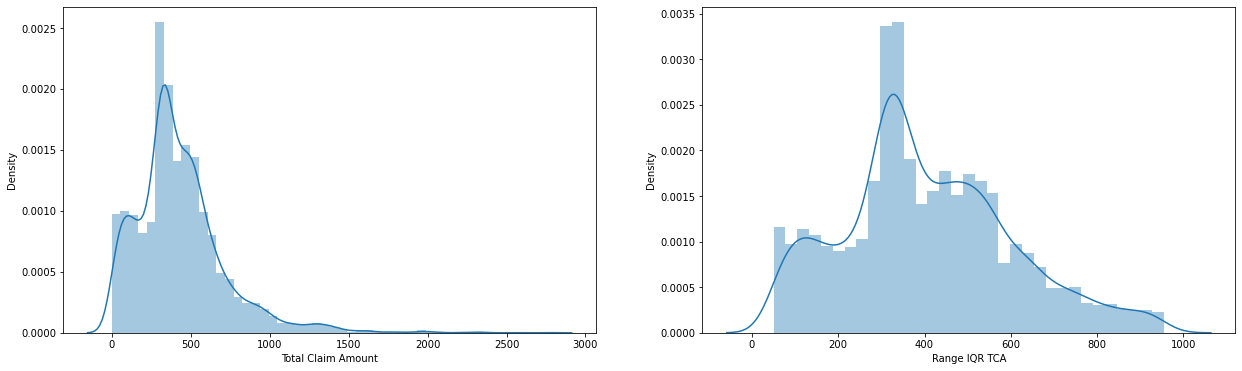

In [33]:
# Filter data
df_clean = df_clean[(df_clean['Total Claim Amount'] <= 956.04)]

# Plot filter data
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0])
sns.distplot(df_clean['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range IQR TCA');

The range of data in the Total Claim Amount is 2759.79 while the maximum value in the Total Claim Amount is 956.04, there will be a lot of data outliers that will affect the data and must match the data range required in the analysis, so filtering this data will reduce the risk of data bias.

**Monthly Premium Auto**

In [34]:
df_clean['Monthly Premium Auto'].describe()

count    4699.000000
mean       88.230900
std        26.200014
min        61.000000
25%        68.000000
50%        79.000000
75%       105.000000
max       285.000000
Name: Monthly Premium Auto, dtype: float64

In [35]:
# Monthly Premium Auto check anomalies
df_clean[df_clean['Monthly Premium Auto'] > 169].count()['Monthly Premium Auto']

91

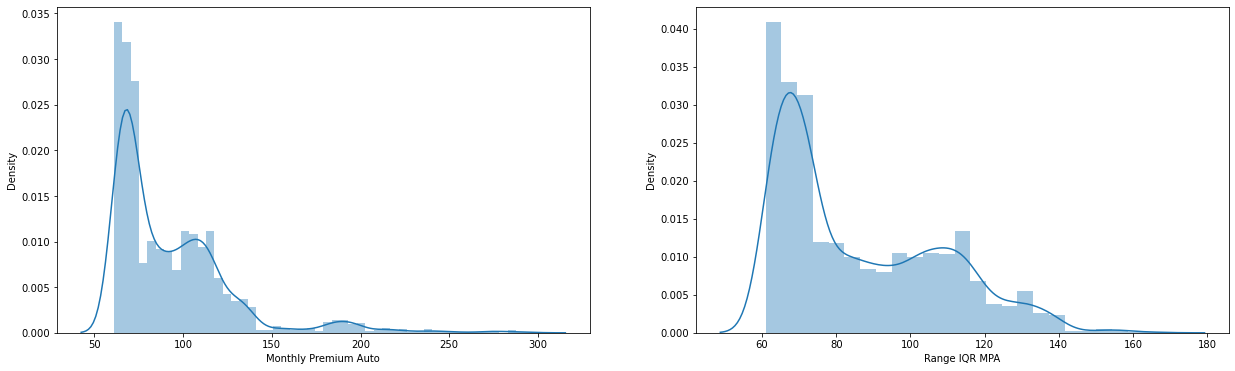

In [36]:
# Filter data
df_clean = df_clean[(df_clean['Monthly Premium Auto'] <= 169)]

# Plot filter data
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Monthly Premium Auto'], ax=axes[0])
sns.distplot(df_clean['Monthly Premium Auto'], ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range IQR MPA');

The range of data in Monthly Premium Auto is 285, while the maximum value in Monthly Premium Auto is 169, there will be a lot of data outliers that will affect the data and must match the range of data required in the analysis, so filtering this data will reduce the risk of the data being biased.

## Clean Dataset

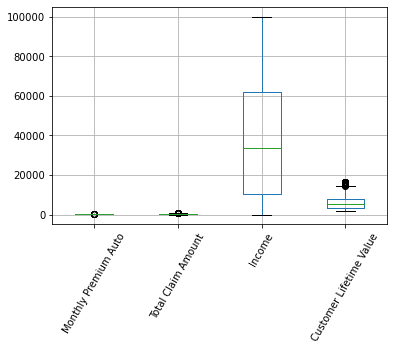

In [37]:
# Boxplot to check outliers
df_clean.boxplot(rot=60);

In the plot above, although it still has outliers, but if it's in the range of data required, the outliers can be concluded as **general ouliers** because there are indeed some people who have high value in the customer as well as some supportive customer circumstances to make themselves different from other customers so that can not be avoided.

In [38]:
# Dataset
df_clean.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,62.0,355.820799,19030.0,2372.155492


In [39]:
#Data Info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4608 entries, 0 to 5665
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4608 non-null   object 
 1   Coverage                 4608 non-null   object 
 2   Renew Offer Type         4608 non-null   object 
 3   EmploymentStatus         4608 non-null   object 
 4   Marital Status           4608 non-null   object 
 5   Monthly Premium Auto     4608 non-null   float64
 6   Total Claim Amount       4608 non-null   float64
 7   Income                   4608 non-null   float64
 8   Customer Lifetime Value  4608 non-null   float64
dtypes: float64(4), object(5)
memory usage: 360.0+ KB


It can be seen that the total final data to be analyzed after going through preprocessing and feature engineering has 4608 data with 9 features

# Model Machine Learning

In [40]:
# Import library

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Encoder

In order to use all the selected features, the categorical features must be converted to numerical features. We can use ColumnTransformer to change this data type, which can later be applied to the model pipeline.

1. onehot = Coverage , Renew Offer Type 
2. binary = Vehicle Class , EmploymentStatus

In [41]:
df_clean

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...
5659,Two-Door Car,Basic,Offer1,Retired,Divorced,71.0,697.798804,10787.0,4995.171200
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,72.0,391.636628,0.0,4936.888359
5663,Four-Door Car,Basic,Offer1,Employed,Married,69.0,446.084760,30595.0,8114.409136
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,74.0,532.800000,0.0,2442.216651


In [42]:
# Change feature to Numeric
transformer = ColumnTransformer([('One Hot', OneHotEncoder(), ['Coverage', 'Renew Offer Type', 'Marital Status']),
                                 ('Binary', ce.BinaryEncoder(), ['Vehicle Class', 'EmploymentStatus']),
                                 ('Imputer', IterativeImputer(), ['Income']),
                                ], remainder='passthrough')

## Data Split

In [43]:
# Split data with independen and dependen variable
X = df_clean.drop(['Customer Lifetime Value'], axis=1)
y = df_clean['Customer Lifetime Value']

In [44]:
# Splitting training and test data with a proportion 80:20
X_train, X_test, y_train, y_test= train_test_split( X,
                                                    y,  
                                                    test_size=0.2,
                                                    random_state=1)

In [45]:
# Define the algorithm used
linear = LinearRegression()
KNN = KNeighborsRegressor()
DecTree = DecisionTreeRegressor(random_state=1)
RandForest = RandomForestRegressor(random_state=1)
XGB = XGBRegressor(random_state=1)

# The modeling is done on a logarithmic scale, inverted again for interpretation
log_linear = TransformedTargetRegressor(linear, func=np.log, inverse_func=np.exp)
log_KNN = TransformedTargetRegressor(KNN, func=np.log, inverse_func=np.exp)
log_DecTree = TransformedTargetRegressor(DecTree, func=np.log, inverse_func=np.exp)
log_RandForest = TransformedTargetRegressor(RandForest, func=np.log, inverse_func=np.exp)
log_XGB = TransformedTargetRegressor(XGB, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = RobustScaler()

# Algorithm candidate
models = [log_linear, log_DecTree, log_RandForest, log_KNN, log_XGB]

value_rmse = []
mean_rmse = []
std_rmse = []

value_mae = []
mean_mae = []
std_mae = []

value_mape = []
mean_mape = []
std_mape = []

# Finding the best algorithm based on the MAE 
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([('preprocessing', transformer),
                          ('scaler', scaler),
                          ('model', i)])

    # RMSE
    cv_rmse = cross_val_score(estimator, 
                              X_train, 
                              y_train, 
                              cv=crossval, 
                              scoring='neg_root_mean_squared_error', 
                              error_score='raise')

    print(cv_rmse, i)

    value_rmse.append(cv_rmse)
    mean_rmse.append(cv_rmse.mean())
    std_rmse.append(cv_rmse.std())

    # MAE
    cv_mae = cross_val_score(estimator, 
                             X_train, 
                             y_train, 
                             cv=crossval, 
                             scoring='neg_mean_absolute_error', 
                             error_score='raise')

    print(cv_mae, i)

    value_mae.append(cv_mae)
    mean_mae.append(cv_mae.mean())
    std_mae.append(cv_mae.std())

    # MAPE
    cv_mape = cross_val_score(estimator, 
                              X_train, 
                              y_train, 
                              cv=crossval, 
                              scoring='neg_mean_absolute_percentage_error', 
                              error_score='raise')

    print(cv_mape, i)

    value_mape.append(cv_mape)
    mean_mape.append(cv_mape.mean())
    std_mape.append(cv_mape.std())

[-3194.83923576 -2879.51885503 -2736.90752545 -2952.49817716
 -3064.60759207] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2464.61117481 -2250.05850496 -2101.55758403 -2253.20376405
 -2321.67818531] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.44597828 -0.40227956 -0.39523797 -0.40407395 -0.41218271] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-4006.17626325 -3920.97742182 -3570.74329324 -3843.72307924
 -3633.95372759] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-2734.23785117 -2640.5200082  -2472.11677101 -2627.77809424
 -2360.17623887] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
    

In [46]:
# Evaluation of the results of the 5 candidate algorithms used
pd.DataFrame({
    'Model': ['Linear Regression', 'DecisionTree Regressor', 'RandomForest Regressor','KNN Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-2965.674277,156.355347,-2278.221843,117.693479,-0.411950,0.017848
1,DecisionTree Regressor,-3795.114757,166.773241,-2566.965793,133.301580,-0.487630,0.028252
2,RandomForest Regressor,-2843.600106,116.474657,-2073.282287,97.376775,-0.379962,0.016434
3,KNN Regressor,-3034.455352,121.262546,-2277.006152,90.867977,-0.417995,0.011986
4,XGBoost Regressor,-2963.092826,120.284095,-2160.492870,103.278369,-0.394697,0.016815


**(Lewis 1982)** interpretation :

**MAPE** results is a means to judge the accuracy of the forecast less that 10% is a highly accurate forecast, 11% to 20% is a good forecast, 21% to 50% is a reasonable forecast and 51% or more is an inaccurate forecast.

- KNN Regressor has stable **absolute values** with low error and high mean
- Random Forest has a stable slightly good **absolute value** in mean and low error

Predictions will be made on the test set with the 2 best benchmark models, KNN and Random Forest to see who has a stable high mean and low error to each other model

In [47]:
# Benchmark Model
models = {'KNN': KNeighborsRegressor(),
          'Random Forest': RandomForestRegressor(random_state=1)}

rmse = []
mae = []
mape = []

# Test set prediction
for i in models:

    model = Pipeline([('preprocessing', transformer),
                      ('scaler', scaler),
                      ('model', models[i])])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(mean_absolute_error(y_test, y_pred))
    mape.append(mean_absolute_percentage_error(y_test, y_pred))

before_tuning = pd.DataFrame(
                            {'RMSE': rmse, 
                             'MAE': mae, 
                             'MAPE': mape}, 
                            index=models.keys())
before_tuning

,RMSE,MAE,MAPE
KNN,2899.260431,2208.104469,0.449926
Random Forest,2760.930933,2001.268019,0.418030


When predictions are made on the test set, **Random Forest cumulative performance is slightly better**. This can be seen from the RMSE and MAE values which are slightly lower than KNN.

## Hyperparameter Tuning

Since the Random Forest model performs slightly better than KNN, we will then use this Random Forest model as the final model. At this stage, we will perform hyperparameter tuning on the Random Forest model in the hope of improving model performance.

In [48]:
# Number of trees
n_estimators = list(np.arange(1, 100))

# Maximum depth trees
max_depth = list(np.arange(1, 11))

# Number of feature
max_features = ['auto','sqrt']

# Minimum samples split node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum samples leaf node
min_samples_leaf = [1, 2, 5, 10]

# Selecting samples train trees
bootstrap = [True, False]

# Hyperparam space 
hyperparam_space = {
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth, 
    'model__max_features': max_features,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__bootstrap': bootstrap,
}

In [49]:
# Best model with hyperparameter tuning
model = RandomForestRegressor(random_state=1)

# Algorithm chains
estimator_best = Pipeline([('preprocessing', transformer),
                           ('scaler', scaler),
                           ('model', model)
                          ])

crossval = KFold(n_splits=4, shuffle=True, random_state=1)

# Best model cross validation
random_best = RandomizedSearchCV(estimator_best, 
                                 param_distributions = hyperparam_space,
                                 n_iter = 50,
                                 cv = crossval,
                                 scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
                                 n_jobs = -1,
                                 refit = 'neg_root_mean_squared_error', 
                                 random_state = 1)

In [50]:
# Training data fitting to find the best parameters
random_best.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Coverage',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                            

In [51]:
# View the tuning results in the form of a dataframe. Sorted by RMSE, MAE & MAPE
pd.DataFrame(random_best.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__bootstrap,...,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
3,0.366580,0.017641,0.029450,0.001111,90,2,1,sqrt,9,False,...,-2129.797150,116.764649,2,-0.477966,-0.406062,-0.421729,-0.431018,-0.434194,0.026800,3
13,0.717431,0.007479,0.029571,0.002724,91,2,1,auto,10,True,...,-2128.857590,94.507770,1,-0.469804,-0.410822,-0.423925,-0.431048,-0.433900,0.021962,2
10,0.738246,0.006158,0.029645,0.001178,96,2,2,auto,10,True,...,-2130.059105,94.673300,3,-0.467610,-0.410992,-0.423098,-0.430681,-0.433095,0.021128,1
19,0.581286,0.007527,0.031843,0.005086,82,10,1,auto,9,True,...,-2153.792571,106.007738,4,-0.475895,-0.414011,-0.424884,-0.436972,-0.437940,0.023370,4
25,0.102784,0.003262,0.018047,0.005121,21,10,1,sqrt,9,True,...,-2161.362164,119.698597,5,-0.483344,-0.413241,-0.424838,-0.441305,-0.440682,0.026573,8


In [52]:
# Check the best score and params
print('Random Forest')
print('Best_score:', random_best.best_score_)
print('Best_params:', random_best.best_params_)

Random Forest
Best_score: -2790.4453225914594
Best_params: {'model__n_estimators': 90, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 9, 'model__bootstrap': False}


## Prediction

Make predictions on the test set using Random Forest model and selected hyperparameters.

In [53]:
# Model XGBoost
model = {'Random Forest': RandomForestRegressor(random_state=1)}

# Define model best estimator
model_tuning = random_best.best_estimator_

# Fitting model
model_tuning.fit(X_train, y_train)

# Predict test set
y_pred = model_tuning.predict(X_test)

# Metrics RMSE, MAE & MAPE after tuning
rmse_tuning = np.sqrt(mean_squared_error(y_test, y_pred))
mae_tuning = mean_absolute_error(y_test, y_pred)
mape_tuning = mean_absolute_percentage_error(y_test, y_pred)

after_tuning = pd.DataFrame({'RMSE': rmse_tuning, 'MAE': mae_tuning, 'MAPE': mape_tuning}, index=model.keys())
after_tuning

,RMSE,MAE,MAPE
Random Forest,2666.022326,2040.762664,0.427732


## Compared

Comparison of Random Forest model performance before and after hyperparameter tuning.

In [54]:
# Before hyperparameter tuning
pd.DataFrame(before_tuning.loc['Random Forest']).T

,RMSE,MAE,MAPE
Random Forest,2760.930933,2001.268019,0.41803


In [55]:
# After hyperparameter tuning
after_tuning

,RMSE,MAE,MAPE
Random Forest,2666.022326,2040.762664,0.427732


The model experienced a increase slightly in performance (error values decreased) with hyperparameter tuning.

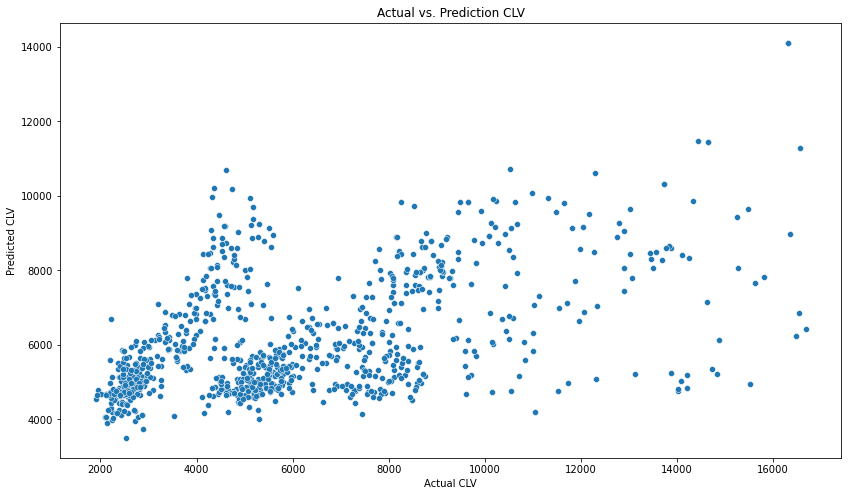

In [56]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs. Prediction CLV', 
                                                         xlabel='Actual CLV', 
                                                         ylabel='Predicted CLV');

The plot above shows that the distribution of the data is close to 45 degrees and can be used as a model that can be used with the condition that y_test and y_pred are approximately the same.

## Features Importance

To be able to find out what features really affect CLV, we can check it through the feature importance function.

In [57]:
importance = list(model_tuning['model'].feature_importances_)

In [58]:
onehot = list(transformer.transformers_[0][1].get_feature_names())

In [59]:
binary = transformer.transformers_[1][1].get_feature_names()

In [60]:
feature_names = onehot + binary + ['Income','Monthly Premium Auto', 'Total Claim Amount']

In [61]:
importance_table = pd.DataFrame({
    'importance': importance
}, index = feature_names)
importance_table

,importance
x0_Basic,0.033005
x0_Extended,0.019885
x0_Premium,0.027291
x1_Offer1,0.027200
x1_Offer2,0.019606
x1_Offer3,0.010548
x1_Offer4,0.014764
x2_Divorced,0.017234
x2_Married,0.014478
x2_Single,0.016702


<AxesSubplot:>

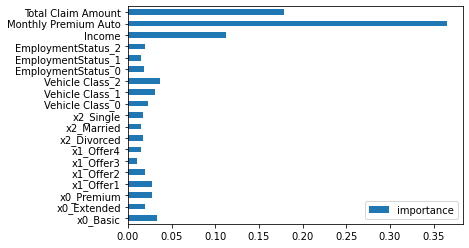

In [62]:
importance_table.plot(kind = 'barh')

# Inference

Based on the model, the feature that affects CLV is Monthly Premium Auto

The metrics carried out on RMSE, MAE, MAPE, the value obtained after hyperparameter tuning is 2666.02 with a maximum CLV range of 16687.82 the resulting estimated value will drop to 2666 or far from this value because this data has a high bias seen from the high error value results. because the target value which has a value with a number of **thousands** can affect RMSE, MSE , MAPE which are vulnerable to outliers and datasets that have a lack of features that should be able to represent the target.

# Reference

1. This target requires a lot of transaction data and customer time data is needed for CLV target data analysis 

2. If possible, add features in reference above with the CLV target, it takes a lot of transactions that can support the target to see which customers should be treated properly by the company such as time retention transaction data, other transactions that can support the CLV target. In addition, latest data for the Insurance Company will certainly be able to improve the predictive capacity of the model.

3. This model can be used for other data to be able to make customer value decisions in several companies that require indifference product insurance.

4. The model can be improved by developing other models as needed according to the increasing needs of the company over time needed.

5. Tried to lower the error better than before could more persuasive to know which target standard with company.

6. Make sure to change the data first to be flexible so that it could be changed properly in preprocessing

# Save Model

In [63]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', RandomForestRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('modelInsurance.sav', 'wb'))

In [64]:
#Load model
file = 'modelInsurance.sav'
load_model = pickle.load(open(file, 'rb'))

In [65]:
np.sqrt(mean_squared_error(y_test, load_model.predict(X_test)))

2760.993095268491